In [1]:
'''
!pip install prophet
!pip install plotly
'''

'\n!pip install prophet\n!pip install plotly\n'

In [2]:
# Importando as bibliotecas
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns

/home/geovanne/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('train.csv', low_memory=False)

In [4]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [5]:
# Variável que receberá o input da seleção da loja do usuário
i = 1

In [6]:
# Selecionando os dados apenas de uma loja

df = df.loc[df.Store == i]

In [7]:
df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1011635,1,6,2013-01-05,4997,635,1,0,0,1
1012750,1,5,2013-01-04,4486,619,1,0,0,1
1013865,1,4,2013-01-03,4327,578,1,0,0,1
1014980,1,3,2013-01-02,5530,668,1,0,0,1


In [8]:
df.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [9]:
# Transformando data para datetime
df['Date'] = pd.to_datetime(df['Date'])

/tmp/ipykernel_30579/3706645630.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


In [10]:
df.dtypes

Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Sales                     int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

In [11]:
df['StateHoliday'].value_counts()

StateHoliday
0    915
a     17
b      6
c      4
Name: count, dtype: int64

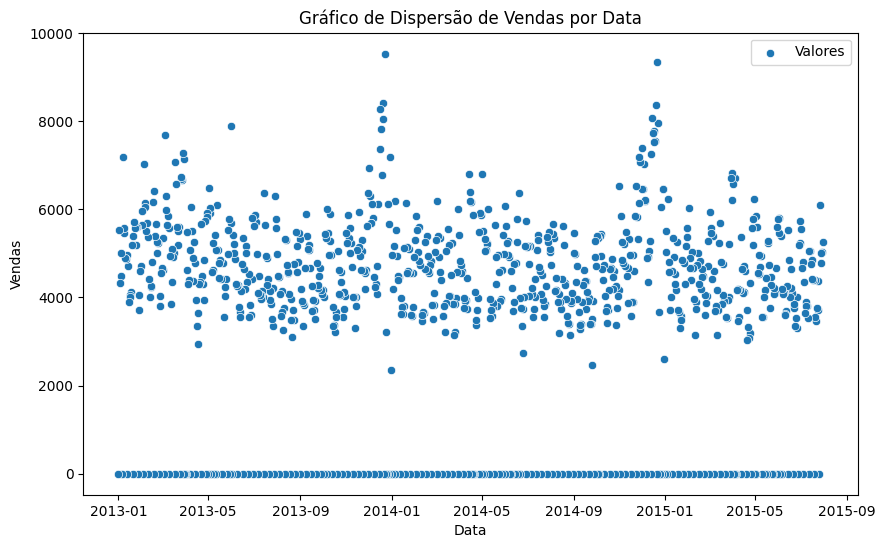

In [12]:
# Imprimindo o gráfico de dispersão de vendas por data
color_pal = sns.color_palette()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Sales', data=df, color=color_pal[0], label='Valores')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Gráfico de Dispersão de Vendas por Data')
plt.legend()
plt.show()

In [13]:
# Fazer gráfico para vendas de 1 mês

In [14]:
# Renomeando 'Dates' para 'ds' e 'Sales' para 'y'
df = df.rename(columns={'Date': 'ds', 'Sales': 'y'})

In [15]:
# Dividindo em treino e teste 
split_date = '01-01-2015'
df_train = df.loc[df.ds <= split_date].copy()
df_test = df.loc[df.ds > split_date].copy()

/tmp/ipykernel_30579/1776712662.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_plot.rename(columns={'y': 'Validation Set'}, inplace=True)
/tmp/ipykernel_30579/1776712662.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_plot.rename(columns={'y': 'Training Set'}, inplace=True)


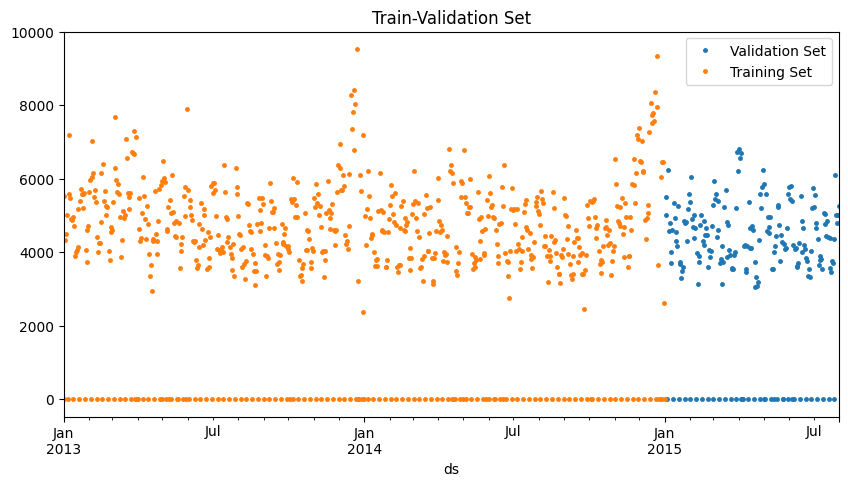

In [17]:
# Plotando o treino e teste
columns = ['ds', 'y']
df_train_plot = df_train[columns]
df_test_plot = df_test[columns]

# Set 'Date' as the index for both DataFrames
df_test_plot.set_index('ds', inplace=True)
df_train_plot.set_index('ds', inplace=True)

# Rename the 'Sales' columns for better visualization in the plot
df_test_plot.rename(columns={'y': 'Validation Set'}, inplace=True)
df_train_plot.rename(columns={'y': 'Training Set'}, inplace=True)

# Join the two DataFrames on the 'Date' index using outer join
merged_df = df_test_plot.join(df_train_plot, how='outer')

# Plot the data
merged_df.plot(figsize=(10, 5), title='Train-Validation Set', style='.', ms=5)

plt.show()

In [18]:
df['StateHoliday'].value_counts()

StateHoliday
0    915
a     17
b      6
c      4
Name: count, dtype: int64

In [19]:
# Criando os DataFrames dos Holidays

# Public Holiday
public_holiday=df[df['StateHoliday']=='a']

public = pd.DataFrame({
  'holiday': 'public',
  'ds': public_holiday['ds'],
  'lower_window': 0,
  'upper_window': 0,
})

# Easter Holiday
easter_holiday=df[df['StateHoliday']=='b']

easter = pd.DataFrame({
  'holiday': 'easter',
  'ds': easter_holiday['ds'],
  'lower_window': 0,
  'upper_window': 0,
})

# Christmas Holiday
christmas_holiday=df[df['StateHoliday']=='c']

christmas = pd.DataFrame({
  'holiday': 'christmas',
  'ds': christmas_holiday['ds'],
  'lower_window': -1,
  'upper_window': 0,
})

# School Holiday
school_holiday=df[df['SchoolHoliday']==1]

school = pd.DataFrame({
  'holiday': 'school',
  'ds': school_holiday['ds'],
  'lower_window': 0,
  'upper_window': 0,
})

holidays=pd.concat((public, easter, christmas, school))

In [20]:
holidays

,holiday,ds,lower_window,upper_window
63555,public,2015-06-04,0,0
74705,public,2015-05-25,0,0
86970,public,2015-05-14,0,0
101465,public,2015-05-01,0,0
235265,public,2015-01-01,0,0
...,...,...,...,...
1011635,school,2013-01-05,0,0
1012750,school,2013-01-04,0,0
1013865,school,2013-01-03,0,0
1014980,school,2013-01-02,0,0


In [21]:
# Treinando o modelo com os dados de treino
model = Prophet(holidays=holidays, weekly_seasonality=True)
model.fit(df_train)

13:28:12 - cmdstanpy - INFO - Chain [1] start processing
13:28:13 - cmdstanpy - INFO - Chain [1] done processing


In [22]:
# Testando com os dados de teste
forecast_test = model.predict(df_test)

In [23]:
forecast_test[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(10)

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-02,5397.974318,4426.974817,6432.192254
1,2015-01-03,5459.866033,4480.189002,6481.839450
2,2015-01-04,344.017840,-683.810695,1281.735855
3,2015-01-05,5478.134085,4343.428470,6579.945768
4,2015-01-06,4885.438534,3900.490510,5908.740826
5,2015-01-07,4687.483963,3704.290653,5682.831975
6,2015-01-08,4517.210462,3509.859084,5477.292431
7,2015-01-09,4729.305496,3702.322507,5736.320762
8,2015-01-10,4738.354821,3739.944492,5764.042102
9,2015-01-11,-310.182857,-1354.129263,763.010873


In [24]:
df_test

,Store,DayOfWeek,ds,y,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1
...,...,...,...,...,...,...,...,...,...
229690,1,2,2015-01-06,4574,595,1,1,0,1
230805,1,1,2015-01-05,6239,712,1,1,0,1
231920,1,7,2015-01-04,0,0,0,0,0,1
233035,1,6,2015-01-03,5023,645,1,0,0,1


In [25]:
help(Prophet.plot)

Help on function plot in module prophet.forecaster:

plot(self, fcst, ax=None, uncertainty=True, plot_cap=True, xlabel='ds', ylabel='y', figsize=(10, 6), include_legend=False)
    Plot the Prophet forecast.
    
    Parameters
    ----------
    fcst: pd.DataFrame output of self.predict.
    ax: Optional matplotlib axes on which to plot.
    uncertainty: Optional boolean to plot uncertainty intervals.
    plot_cap: Optional boolean indicating if the capacity should be shown
        in the figure, if available.
    xlabel: Optional label name on X-axis
    ylabel: Optional label name on Y-axis
    figsize: Optional tuple width, height in inches.
    include_legend: Optional boolean to add legend to the plot.
    
    Returns
    -------
    A matplotlib figure.



/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


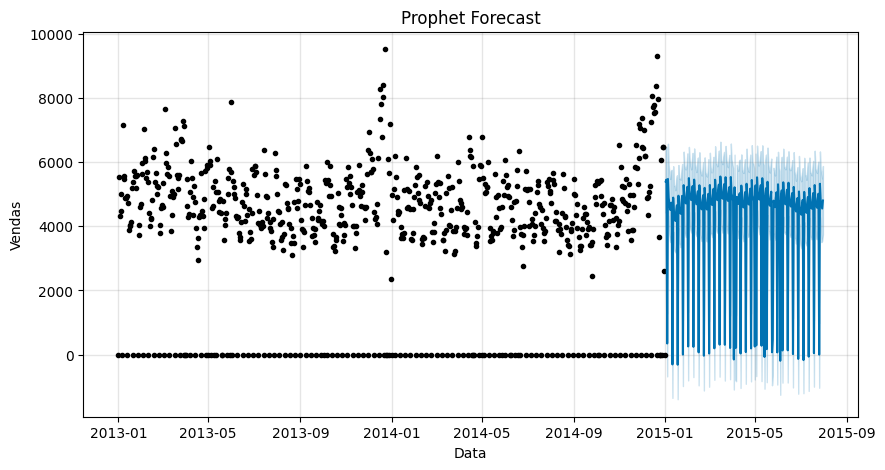

In [26]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(forecast_test, uncertainty= True, ax=ax)
ax.set_title('Prophet Forecast')
plt.ylabel('Vendas')
plt.xlabel('Data')
plt.show()

/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain th

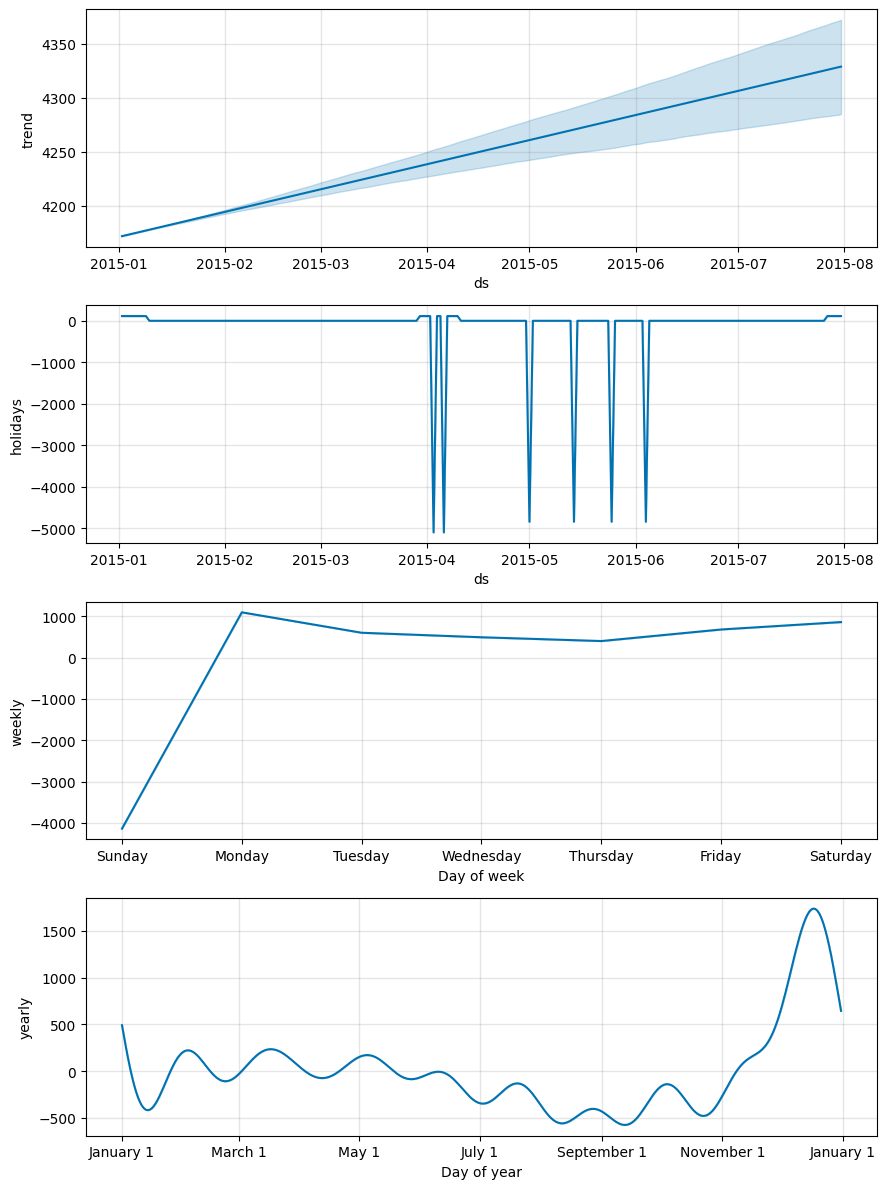

In [27]:
fig = model.plot_components(forecast_test)
plt.show()

/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


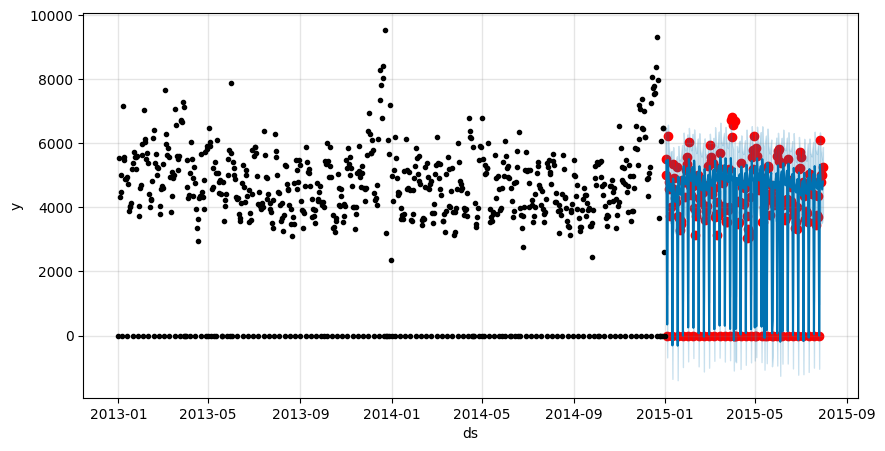

In [28]:
# Plot the forecast with the actuals
f, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_test['ds'], df_test['y'], color='r')
fig = model.plot(forecast_test, ax=ax)

In [29]:
df_test.dtypes

Store                     int64
DayOfWeek                 int64
ds               datetime64[ns]
y                         int64
Customers                 int64
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
dtype: object

/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


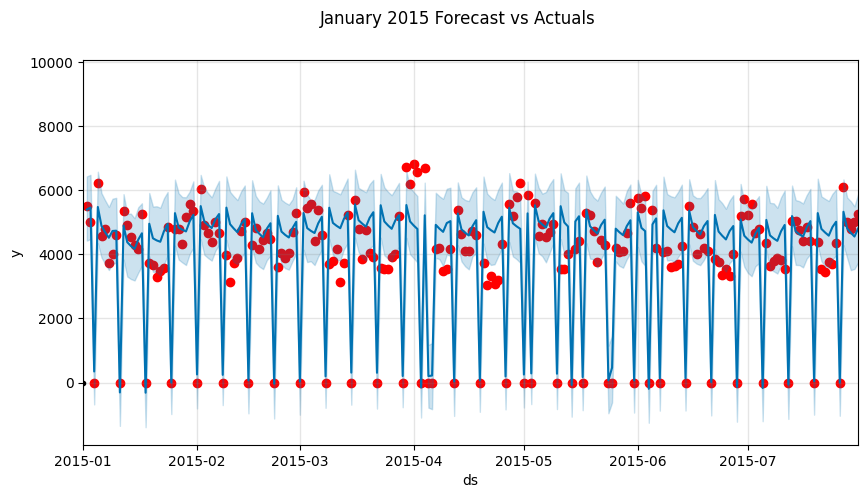

In [30]:
df_test['ds'] = pd.to_datetime(df_test['ds'])
forecast_test['ds'] = pd.to_datetime(forecast_test['ds'])

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_test['ds'], df_test['y'], color='r', label='Actuals')
model.plot(forecast_test, ax=ax)
ax.set_xbound(lower=pd.Timestamp('2015-01-01'), 
              upper=pd.Timestamp('2015-07-31'))
plot = plt.suptitle('January 2015 Forecast vs Actuals')
plt.show()

In [31]:
future = model.make_future_dataframe(periods=90)

In [32]:
future = future.tail(90)
future

,ds
731,2015-01-02
732,2015-01-03
733,2015-01-04
734,2015-01-05
735,2015-01-06
...,...
816,2015-03-28
817,2015-03-29
818,2015-03-30
819,2015-03-31


In [33]:
# help(Prophet.make_future_dataframe)

In [35]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head(30)

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-02,5397.974318,4350.171673,6538.011273
1,2015-01-03,5459.866033,4461.964591,6500.038577
2,2015-01-04,344.017840,-714.613869,1295.460800
3,2015-01-05,5478.134085,4397.661488,6434.769730
4,2015-01-06,4885.438534,3833.166369,5850.030064
5,2015-01-07,4687.483963,3662.926952,5791.723873
6,2015-01-08,4517.210462,3554.994810,5550.457013
7,2015-01-09,4729.305496,3742.449787,5739.968878
8,2015-01-10,4738.354821,3742.426018,5731.113289
9,2015-01-11,-310.182857,-1310.525627,683.379001


/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


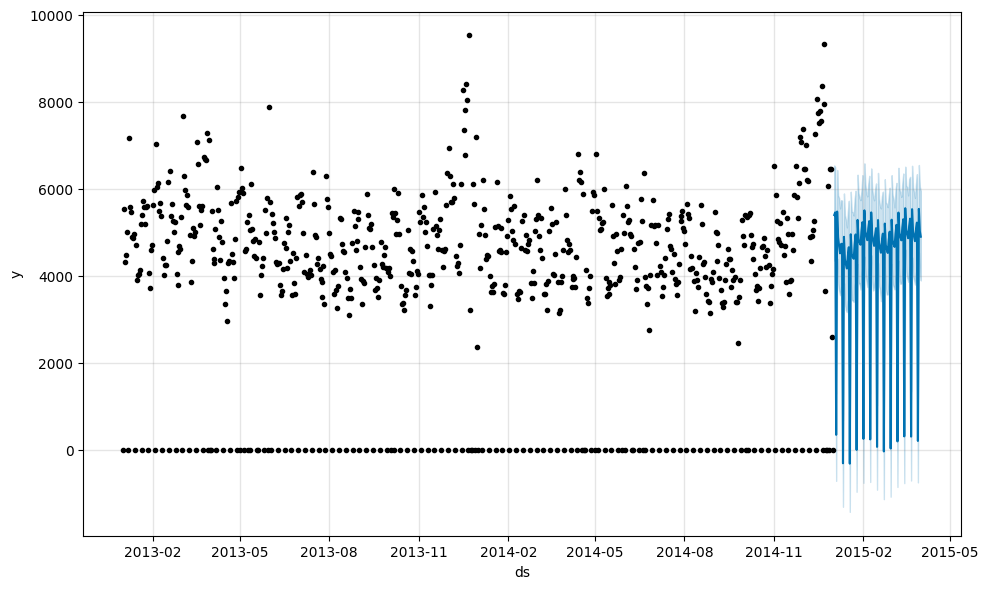

In [41]:
fig1 = model.plot(forecast)

/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/geovanne/.local/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain th

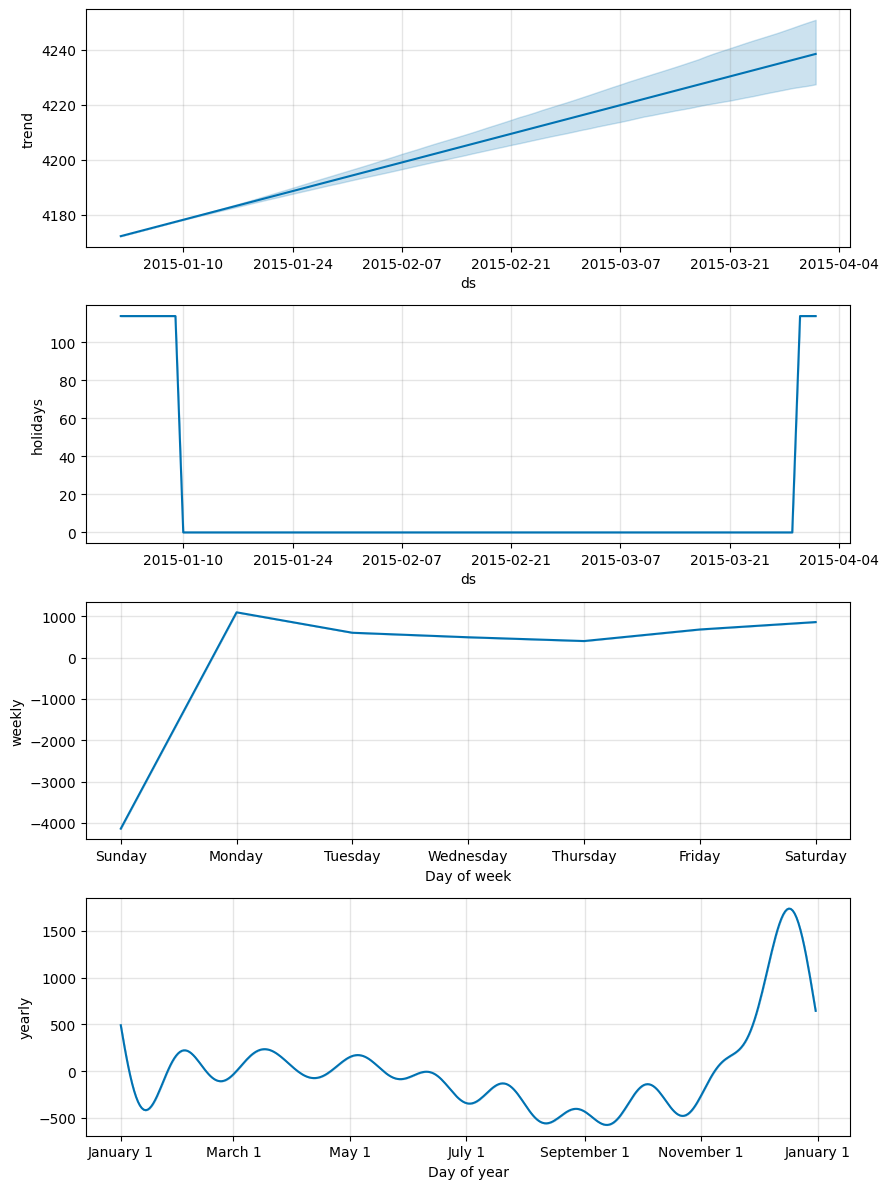

In [39]:
fig2 = model.plot_components(forecast)

In [40]:
# Testando o modelo
df_test = pd.read_csv('test.csv')
df_test

FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

In [ ]:
df_test['Date'] = pd.to_datetime(df_test['Date'])
df_test = df.rename({'Date' : 'ds'})

In [ ]:
ds = df_test['ds']
ds = pd.DataFrame(ds, columns=['ds'])

In [ ]:
ds

In [ ]:
forecast = m.predict(ds)